# <center>Author: Victor Diallen

# Table of Contents :
* [1. Introduction](#section1)
* [2. Importing Libraries](#section2)
* [3. Loading Datasets](#section3)
* [4. Exploratory Analysis](#section4)
* [5. Adjusting Dataset for Spark Environment](#section5)
* [6. Machine Learning](#section6)

<a id="section1"></a>
# Introduction

## About Dataset

- This dataset contains a collection of tweets with the hashtag #chatgpt. The tweets were scraped from Twitter and cover a range of topics related to the ChatGPT language model.

- The dataset provides a glimpse into the online conversation surrounding the ChatGPT language model and can be used for various natural language processing and machine learning tasks, such as sentiment analysis, topic modeling, and more. It allows understanding the community, the level of interest, and the use of chatGPT.

<a id="section2"></a>
# Importing Libraries

In [1]:
# Python version used
from platform import python_version
print('Python Version Used in this Jupyter Notebook:', python_version())

Python Version Used in this Jupyter Notebook: 3.9.7


In [2]:
# Imports
import findspark
findspark.init()
import pyspark
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.functions import col,isnan, when, count, udf
import pyspark.sql.functions as F
from pyspark.ml.feature import StopWordsRemover
from pyspark.sql.types import *
from textblob import TextBlob
import translators as ts
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import NGram, VectorAssembler, StopWordsRemover, HashingTF, IDF, Tokenizer, StringIndexer, NGram, ChiSqSelector, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import concat_ws

Using region Pernambuco server backend.



In [3]:
# Libraries versions used in this jupyter notebook
%reload_ext watermark
%watermark -a "Victor Diallen" --iversions

Author: Victor Diallen

seaborn    : 0.11.2
numpy      : 1.21.4
translators: 5.8.5
pyspark    : 3.3.2
findspark  : 2.0.1
matplotlib : 3.4.3
pandas     : 1.3.4



<a id="section3"></a>
# Loading Dataset

In [4]:
df = pd.read_csv('chatgpt1.csv', header=0)
df.head(5)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [5]:
df.isna().sum()

Datetime              0
Tweet Id              0
Text                  0
Username              0
Permalink             0
User                  0
Outlinks          30059
CountLinks        30059
ReplyCount            0
RetweetCount          0
LikeCount             0
QuoteCount            0
ConversationId        0
Language              0
Source                0
Media             40499
QuotedTweet       46438
MentionedUsers    32832
hashtag               0
hastag_counts         0
dtype: int64

## Preprocessing Data

In [6]:
df = df.drop(['Outlinks', 'CountLinks', 'Media', 'QuotedTweet', 'MentionedUsers', 'Permalink', 'User', 'QuoteCount', 'ConversationId', 'Source', 'hashtag', 'hastag_counts'], axis=1)

In [7]:
df.head(5)

,Datetime,Tweet Id,Text,Username,ReplyCount,RetweetCount,LikeCount,Language
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,1,0,5,ja
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,1,0,5,en
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,0,0,4,de
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,0,0,2,en
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,0,0,4,tr


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Datetime      50001 non-null  object
 1   Tweet Id      50001 non-null  int64 
 2   Text          50001 non-null  object
 3   Username      50001 non-null  object
 4   ReplyCount    50001 non-null  int64 
 5   RetweetCount  50001 non-null  int64 
 6   LikeCount     50001 non-null  int64 
 7   Language      50001 non-null  object
dtypes: int64(4), object(4)
memory usage: 3.1+ MB


In [9]:
df['Tweet Id'] = df['Tweet Id'].apply(str)

In [10]:
df = df.rename(columns={'Tweet Id': 'Tweet_Id'})

In [11]:
df['Date'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d').dt.date

In [12]:
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%m')

In [13]:
df.head(5)

,Datetime,Tweet_Id,Text,Username,ReplyCount,RetweetCount,LikeCount,Language,Date,Month
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,1,0,5,ja,2023-01-22,01
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,1,0,5,en,2023-01-22,01
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,0,0,4,de,2023-01-22,01
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,0,0,2,en,2023-01-22,01
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,0,0,4,tr,2023-01-22,01


<a id="section4"></a>
# Exploratory Analysis

In [14]:
df.shape

(50001, 10)

In [15]:
df.columns

Index(['Datetime', 'Tweet_Id', 'Text', 'Username', 'ReplyCount',
       'RetweetCount', 'LikeCount', 'Language', 'Date', 'Month'],
      dtype='object')

In [16]:
df.isna().sum()

Datetime        0
Tweet_Id        0
Text            0
Username        0
ReplyCount      0
RetweetCount    0
LikeCount       0
Language        0
Date            0
Month           0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Datetime      50001 non-null  object
 1   Tweet_Id      50001 non-null  object
 2   Text          50001 non-null  object
 3   Username      50001 non-null  object
 4   ReplyCount    50001 non-null  int64 
 5   RetweetCount  50001 non-null  int64 
 6   LikeCount     50001 non-null  int64 
 7   Language      50001 non-null  object
 8   Date          50001 non-null  object
 9   Month         50001 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


In [18]:
df.nunique()

Datetime        41559
Tweet_Id        50001
Text            49555
Username        38433
ReplyCount        108
RetweetCount      138
LikeCount         366
Language           61
Date                3
Month               1
dtype: int64

# Data Analysis

In [19]:
df['Username'].unique()

array(['mochico0123', 'Caput_LupinumSG', 'ciffi', ..., 'marcopiccinini',
       'EuniceNyandat', 'AmericoSD_69'], dtype=object)

In [20]:
df['Username'].value_counts()

translation_ja    60
SaveToNotion      47
trandanhmmo       44
richardkimphd     43
VeilleCyber3      38
                  ..
masayume_32        1
WRoughSketch       1
ayazfarooqui       1
Technology_GD      1
AmericoSD_69       1
Name: Username, Length: 38433, dtype: int64

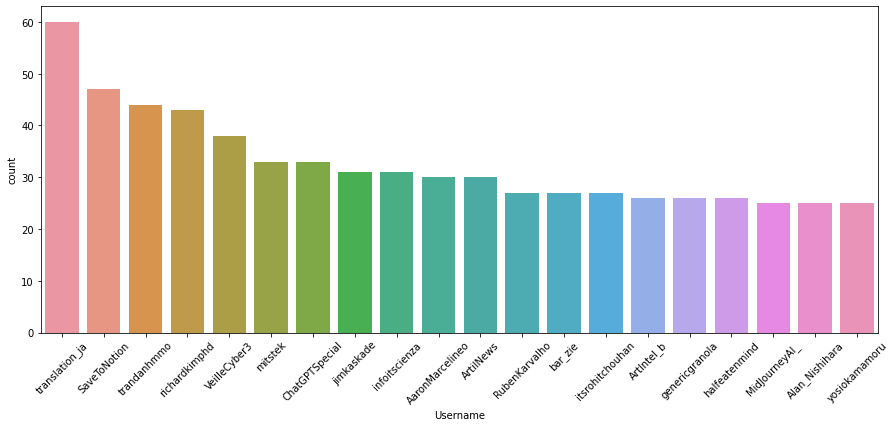

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Username', order=df["Username"].value_counts().index[:20])
plt.xticks(rotation=45)
plt.show()

In [22]:
df['ReplyCount'].unique()

array([   1,    0,   23,    4,   37,    2,    3,  209,  149,  126,   17,
         22,    5,   54,   34,   21,   13, 3098,   69, 1421,   10,    8,
          6,    9,    7,   43,   15,   11,   12,  111,   29,  164,  286,
         28,   20,  496,   14,   31,   40,   47,  374,   33,  338,   26,
        100,   39,   18,   59,  154,   16,   55,  114,  476,   44,   24,
        119,   99,   42,   36,   27,   68,   92,  159,   19,   88,   35,
        446,   52,   45,  147,  106,  166,   32,   89,  165,   50,  130,
         51,   95, 1455, 3044,   96,  490,  194,   48,   74,  248,   72,
         80,   57,   25,   93,   38, 1110,  161,  183,   41,  135,   79,
        103,   71,   49,   30,   63,  176,   67,  777,  331], dtype=int64)

In [23]:
df['ReplyCount'].value_counts()

0      36736
1       9430
2       1801
3        653
4        333
       ...  
45         1
147        1
106        1
166        1
331        1
Name: ReplyCount, Length: 108, dtype: int64

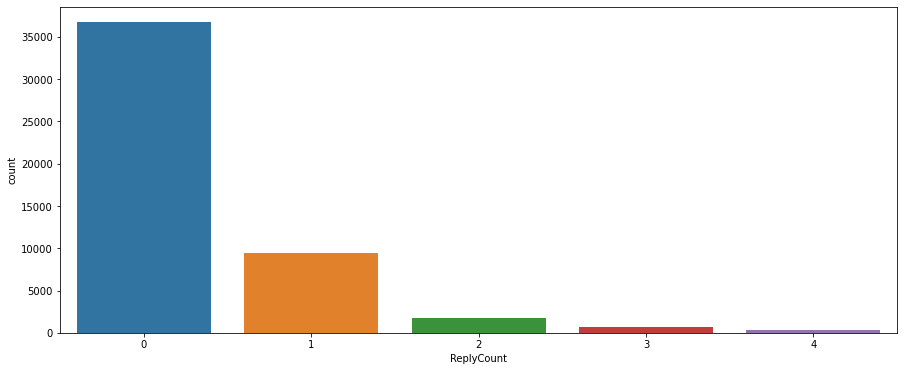

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='ReplyCount', order=df["ReplyCount"].value_counts().index[:5])
plt.xticks(rotation=0)
plt.show()

In [25]:
df['RetweetCount'].unique()

array([   0,    1,    5,    6,  542,   40,   49,   18,    3,    2,   16,
          4,  112,   39,   36, 1094,   12, 6815,   10,   20,    7,   58,
         23,   11,   15,   45,   37,    8,   31,   19,  160,   27,    9,
         38,   34,   14,  125,   17,   74,  461,   68,   26,   13, 2627,
         47,   53,   88,   21,   25,  221,  334,   50,   30,   22,  252,
         33,  713,  597,   76,   43,   28,  227, 1732,   66,   98,  136,
         92,  114,  730,   64,   24,  202, 1874,   67,   29,  186,  118,
         97,   52,  108, 2463,   59,   32,   93,   35,   56,  564, 3987,
        170,   55,  257, 1307,   95,   62,   44,   57,   89,   54,   83,
        222,  337,  236,  376,  121, 1533,  458,   78,   61,   51, 2203,
         70,  428,   42,  140,   46, 1534,  164,  162,  213,  139,  289,
       1113,   48,  418,  206,  107,  148,   99,  516,   41,  452,  630,
        176,   79,   69,  679, 2082,  248], dtype=int64)

In [26]:
df['RetweetCount'].value_counts()

0      42416
1       3925
2       1204
3        620
4        365
       ...  
221        1
222        1
337        1
236        1
248        1
Name: RetweetCount, Length: 138, dtype: int64

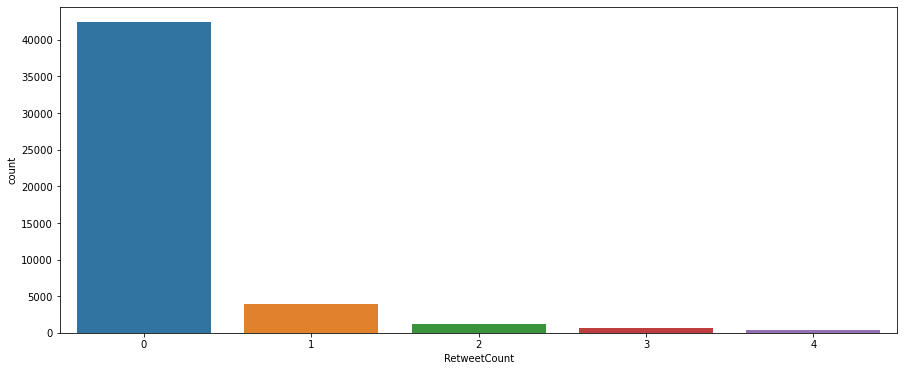

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='RetweetCount', order=df["RetweetCount"].value_counts().index[:5])
plt.xticks(rotation=0)
plt.show()

In [28]:
df['LikeCount'].unique()

array([    5,     4,     2,     1,     0,     3,    66,    20,  9125,
           7,   348,   607,    11,     9,   404,     8,     6,    68,
         329,    10,    17,    15,  1905,   211,    16,    22,    14,
         381,    13,  5682,    42,   190,    57, 56073,    26,    38,
          30,    97,    24,    19,    12,    50,    18,    29,    51,
          33,    41,    55,    44,   663,    75,    54,    39,    21,
          37,   252,    40,    47,   390,    87,   177,    23,    84,
          28,    31,   131,   251,    86,  1055,   171,    65,   144,
          58,   111,    71,    74,   127,    36,    32,   234,   654,
         222,   711,  3952,    43,    46,   273,   168,   349,   239,
         118,   112,    64,    27,   228,    25,    56,   186,    93,
       12557,   733,    98,    61,    35,   100,   147,   322,    49,
         383,   189,    67,    45,    34,   135,   132,   113,    76,
         759,   165,   164,    48,    72,   220,   107,  1608,  2250,
         302,    73,

In [29]:
df['LikeCount'].value_counts()

0      27141
1       9490
2       3873
3       2086
4       1241
       ...  
242        1
202        1
347        1
404        1
424        1
Name: LikeCount, Length: 366, dtype: int64

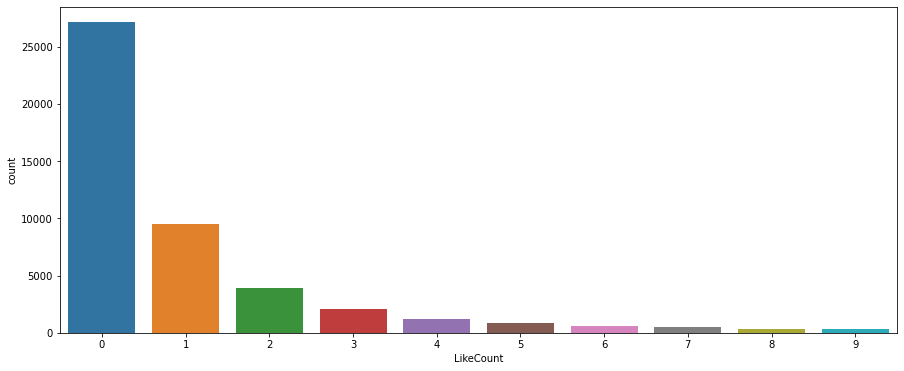

In [30]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='LikeCount', order=df["LikeCount"].value_counts().index[:10])
plt.xticks(rotation=0)
plt.show()

In [31]:
df['Language'].unique()

array(['ja', 'en', 'de', 'tr', 'pl', 'fr', 'es', 'pt', 'lo', 'no', 'ca',
       'zh', 'qme', 'th', 'ne', 'ko', 'und', 'nl', 'fa', 'it', 'da', 'fi',
       'eu', 'hi', 'ar', 'sv', 'in', 'ru', 'qht', 'tl', 'hu', 'cs', 'uk',
       'iw', 'et', 'cy', 'bg', 'ht', 'el', 'vi', 'sl', 'kn', 'ro', 'lt',
       'ur', 'zxx', 'ml', 'mr', 'lv', 'gu', 'qam', 'is', 'ta', 'te', 'pa',
       'sd', 'am', 'sr', 'hy', 'or', 'bn'], dtype=object)

In [32]:
df['Language'].value_counts()

en    32076
ja     5046
es     3315
fr     2492
de     1207
      ...  
sd        1
am        1
hy        1
or        1
bn        1
Name: Language, Length: 61, dtype: int64

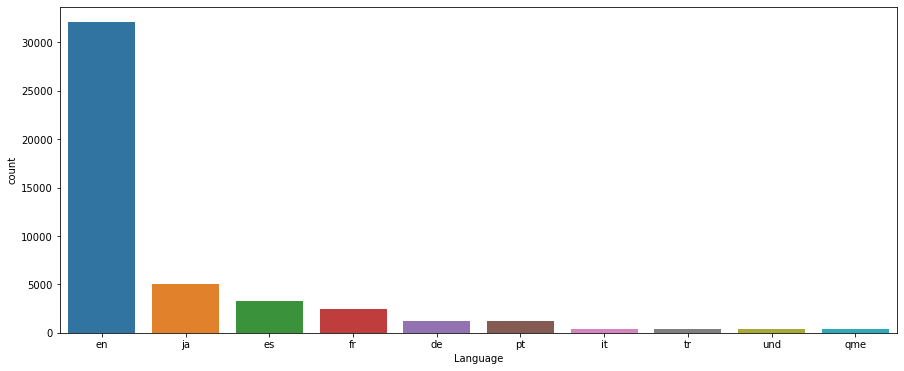

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:10])
plt.show()

In [34]:
df.columns

Index(['Datetime', 'Tweet_Id', 'Text', 'Username', 'ReplyCount',
       'RetweetCount', 'LikeCount', 'Language', 'Date', 'Month'],
      dtype='object')

<a id="section5"></a>
# Adjusting Dataset for Spark Environment

In [35]:
# Keeping only rows that are in english since TextBlob has problems to analyze non-english text.
# English texts are about 65% of all data, this will be enough for this project.
# If you wish, it is possible to translate the non english tweet using the Translators library,
# But two problems with this is: 1- It will raise an error for many requests if data is too big,
# 2- You can try to solve this problem by adding sleep_seconds in the parameters, but doing so, it will take too long to complete
# I'll leave an example of the code below of how to translate the whole column to english
# df['Text_Translated']=df['Text'].apply(lambda x: ts.translate_text(x, to_language='en', sleep_seconds=5))


df_reduced = df[df['Language'] == 'en']

In [36]:
df_reduced = df_reduced.drop(['Datetime', 'Username', 'ReplyCount', 'RetweetCount', 'LikeCount', 'Language', 'Date', 'Month' ], axis=1)

In [37]:
df_reduced.to_csv('chatGPTforSpark.csv', index=None)

## Creating Spark Environment

In [38]:
# Creating Spark Context
sc = SparkContext(appName = "Twitter-ChatGPT-SentimentAnalysis")

In [39]:
# Creating Spark Session
spark_session = SparkSession.Builder().getOrCreate()

In [40]:
# Visualizes spark_session object
spark_session

In [41]:
schema = StructType([ \
    StructField("Tweet_Id",StringType(),False), \
    StructField("Text",StringType(),False) \
  ])

In [42]:
df_spark=(spark_session.read
          .option("header","true")
          .option("multiline", "true")
          .option("schema", "schema")
          .option('escape', "\"")
          .csv('chatGPTforSpark.csv')
)

In [43]:
# Object type
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [44]:
df_spark.show(5)

+-------------------+--------------------+
|           Tweet_Id|                Text|
+-------------------+--------------------+
|1617156291046133761|@AlexandrovnaIng ...|
|1617156332297256961|Bow down to chatG...|
|1617156389217894400|ChatGPT runs 10K ...|
|1617156393898745858|@SWENGDAD There i...|
|1617156404137295878|I created a ficti...|
+-------------------+--------------------+
only showing top 5 rows



In [45]:
# Visualize metadata (schema)
df_spark.printSchema()

root
 |-- Tweet_Id: string (nullable = true)
 |-- Text: string (nullable = true)



In [46]:
print((df_spark.count(), len(df_spark.columns)))

(32076, 2)


In [47]:
# Remove URLs 
# Remove special characters
# Substituting multiple spaces with single space
# Lowercase all text
# Trim the leading/trailing whitespaces

df_spark_clean = (df_spark.withColumn('Text', F.regexp_replace('Text', r"http\S+", ""))
                   .withColumn('Text', F.regexp_replace('Text', r"[^a-zA-z]", " ")) 
                   .withColumn('Text', F.regexp_replace('Text', r"\s+", " ")) 
                   .withColumn('Text', F.lower('Text'))
                   .withColumn('Text', F.trim('Text')))
df_spark_clean.show(5)

+-------------------+--------------------+
|           Tweet_Id|                Text|
+-------------------+--------------------+
|1617156291046133761|alexandrovnaing p...|
|1617156332297256961| bow down to chatgpt|
|1617156389217894400|chatgpt runs k nv...|
|1617156393898745858|swengdad there is...|
|1617156404137295878|i created a ficti...|
+-------------------+--------------------+
only showing top 5 rows



In [48]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'    

In [49]:
sentiment_label_udf = udf(lambda x: get_sentiment(x))

In [50]:
df_spark_clean_labeled = df_spark_clean.select(col("*"), sentiment_label_udf("Text").alias("Tweet_Sentiment_Label"))

In [51]:
df_spark_clean_labeled.show(5)

+-------------------+--------------------+---------------------+
|           Tweet_Id|                Text|Tweet_Sentiment_Label|
+-------------------+--------------------+---------------------+
|1617156291046133761|alexandrovnaing p...|              neutral|
|1617156332297256961| bow down to chatgpt|             negative|
|1617156389217894400|chatgpt runs k nv...|             positive|
|1617156393898745858|swengdad there is...|             negative|
|1617156404137295878|i created a ficti...|              neutral|
+-------------------+--------------------+---------------------+
only showing top 5 rows



In [52]:
df_spark_clean_labeled.toPandas().to_csv('chatGPTFinal.csv', index=None)

In [53]:
df_final = pd.read_csv("chatGPTFinal.csv")

In [54]:
df_final.head()

,Tweet_Id,Text,Tweet_Sentiment_Label
0,1617156291046133761,alexandrovnaing prohibition of chatgpt has bee...,neutral
1,1617156332297256961,bow down to chatgpt,negative
2,1617156389217894400,chatgpt runs k nvidia training gpus with poten...,positive
3,1617156393898745858,swengdad there is repetitive work in every job...,negative
4,1617156404137295878,i created a fictional jewelry brand using chat...,neutral


In [55]:
df_final['Tweet_Sentiment_Label'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [56]:
df_final['Tweet_Sentiment_Label'].value_counts()

positive    14665
neutral     12325
negative     5086
Name: Tweet_Sentiment_Label, dtype: int64

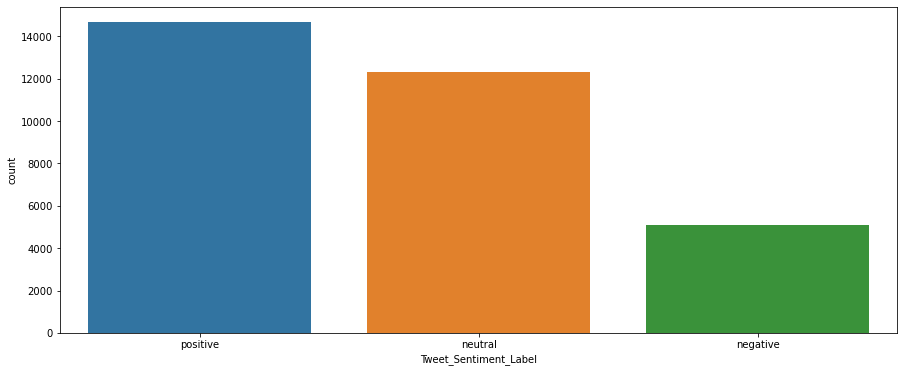

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_final, x='Tweet_Sentiment_Label', order=df_final["Tweet_Sentiment_Label"].value_counts().index[:5])
plt.xticks(rotation=0)
plt.show()

# Conclusion - Pt.1

### As we can see from the count plot above, the majority of the tweets has either positive connotations, almost three times more than negative ones. Neutral comes in second place.

<a id="section6"></a>
# Machine Learning

#### Feature transformer: Tokenizer

In [58]:
from pyspark.ml.feature import Tokenizer

In [59]:
tokenizer = Tokenizer(inputCol="Text", outputCol="Tokens")
df_spark_clean_labeled_tokenized = tokenizer.transform(df_spark_clean_labeled)

df_spark_clean_labeled_tokenized.show(5)

+-------------------+--------------------+---------------------+--------------------+
|           Tweet_Id|                Text|Tweet_Sentiment_Label|              Tokens|
+-------------------+--------------------+---------------------+--------------------+
|1617156291046133761|alexandrovnaing p...|              neutral|[alexandrovnaing,...|
|1617156332297256961| bow down to chatgpt|             negative|[bow, down, to, c...|
|1617156389217894400|chatgpt runs k nv...|             positive|[chatgpt, runs, k...|
|1617156393898745858|swengdad there is...|             negative|[swengdad, there,...|
|1617156404137295878|i created a ficti...|              neutral|[i, created, a, f...|
+-------------------+--------------------+---------------------+--------------------+
only showing top 5 rows



#### Feature transformer: Stopword removal

In [60]:
stopword_remover = StopWordsRemover(inputCol="Tokens", outputCol="Filtered")
df_spark_clean_labeled_tokenized_filtered = stopword_remover.transform(df_spark_clean_labeled_tokenized)

df_spark_clean_labeled_tokenized_filtered.show(5)

+-------------------+--------------------+---------------------+--------------------+--------------------+
|           Tweet_Id|                Text|Tweet_Sentiment_Label|              Tokens|            Filtered|
+-------------------+--------------------+---------------------+--------------------+--------------------+
|1617156291046133761|alexandrovnaing p...|              neutral|[alexandrovnaing,...|[alexandrovnaing,...|
|1617156332297256961| bow down to chatgpt|             negative|[bow, down, to, c...|      [bow, chatgpt]|
|1617156389217894400|chatgpt runs k nv...|             positive|[chatgpt, runs, k...|[chatgpt, runs, k...|
|1617156393898745858|swengdad there is...|             negative|[swengdad, there,...|[swengdad, repeti...|
|1617156404137295878|i created a ficti...|              neutral|[i, created, a, f...|[created, fiction...|
+-------------------+--------------------+---------------------+--------------------+--------------------+
only showing top 5 rows



#### Feature transformer: CountVectorizer (TF - Term Frequency)

In [61]:
cv = CountVectorizer(vocabSize=2**16, inputCol="Filtered", outputCol='CV')
cv_model = cv.fit(df_spark_clean_labeled_tokenized_filtered)
df_spark_CV = cv_model.transform(df_spark_clean_labeled_tokenized_filtered)

df_spark_CV.show(5)

+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+
|           Tweet_Id|                Text|Tweet_Sentiment_Label|              Tokens|            Filtered|                  CV|
+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+
|1617156291046133761|alexandrovnaing p...|              neutral|[alexandrovnaing,...|[alexandrovnaing,...|(36006,[0,40,112,...|
|1617156332297256961| bow down to chatgpt|             negative|[bow, down, to, c...|      [bow, chatgpt]|(36006,[0,7059],[...|
|1617156389217894400|chatgpt runs k nv...|             positive|[chatgpt, runs, k...|[chatgpt, runs, k...|(36006,[0,144,331...|
|1617156393898745858|swengdad there is...|             negative|[swengdad, there,...|[swengdad, repeti...|(36006,[0,26,109,...|
|1617156404137295878|i created a ficti...|              neutral|[i, created, a, f...|[created, fiction..

#### Feature transformer: TF-IDF Vectorization

In [62]:
idf = IDF(inputCol='CV', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
idf_model = idf.fit(df_spark_CV)
df_spark_idf = idf_model.transform(df_spark_CV)

df_spark_idf.show(5)

+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+
|           Tweet_Id|                Text|Tweet_Sentiment_Label|              Tokens|            Filtered|                  CV|            features|
+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+
|1617156291046133761|alexandrovnaing p...|              neutral|[alexandrovnaing,...|[alexandrovnaing,...|(36006,[0,40,112,...|(36006,[0,40,112,...|
|1617156332297256961| bow down to chatgpt|             negative|[bow, down, to, c...|      [bow, chatgpt]|(36006,[0,7059],[...|(36006,[0,7059],[...|
|1617156389217894400|chatgpt runs k nv...|             positive|[chatgpt, runs, k...|[chatgpt, runs, k...|(36006,[0,144,331...|(36006,[0,144,331...|
|1617156393898745858|swengdad there is...|             negative|[swengdad, there,...|[swengdad, repeti...|

#### Label encoder

In [63]:
label_encoder = StringIndexer(inputCol = "Tweet_Sentiment_Label", outputCol = "label")
le_model = label_encoder.fit(df_spark_idf)
df_spark_label = le_model.transform(df_spark_idf)

df_spark_label.show(5)

+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+-----+
|           Tweet_Id|                Text|Tweet_Sentiment_Label|              Tokens|            Filtered|                  CV|            features|label|
+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+-----+
|1617156291046133761|alexandrovnaing p...|              neutral|[alexandrovnaing,...|[alexandrovnaing,...|(36006,[0,40,112,...|(36006,[0,40,112,...|  1.0|
|1617156332297256961| bow down to chatgpt|             negative|[bow, down, to, c...|      [bow, chatgpt]|(36006,[0,7059],[...|(36006,[0,7059],[...|  2.0|
|1617156389217894400|chatgpt runs k nv...|             positive|[chatgpt, runs, k...|[chatgpt, runs, k...|(36006,[0,144,331...|(36006,[0,144,331...|  0.0|
|1617156393898745858|swengdad there is...|             negative|[sweng

### Model training: Logistic regression classifier

In [64]:
lr = LogisticRegression(maxIter=100)

lr_model = lr.fit(df_spark_label)

predictions = lr_model.transform(df_spark_label)

In [65]:
predictions.show(5)

+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|           Tweet_Id|                Text|Tweet_Sentiment_Label|              Tokens|            Filtered|                  CV|            features|label|       rawPrediction|         probability|prediction|
+-------------------+--------------------+---------------------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|1617156291046133761|alexandrovnaing p...|              neutral|[alexandrovnaing,...|[alexandrovnaing,...|(36006,[0,40,112,...|(36006,[0,40,112,...|  1.0|[6.59064993664603...|[2.15330020673735...|       1.0|
|1617156332297256961| bow down to chatgpt|             negative|[bow, down, to, c...|      [bow, chatgpt]|(36006,[0,7059],[...|(36006,[0,7059],[...|  2.0|[-3.7844178192

#### Putting a pipeline together

In [66]:
# Splitting data into train and test
train, test = df_spark_clean_labeled.randomSplit([0.9, 0.1], seed=1200)

# Create transformers for the ML pipeline
tokenizer = Tokenizer(inputCol="Text", outputCol="Tokens")
stopword_remover = StopWordsRemover(inputCol="Tokens", outputCol="Filtered")
cv = CountVectorizer(vocabSize=2**16, inputCol="Filtered", outputCol='CV')
idf = IDF(inputCol='CV', outputCol="1gram_idf", minDocFreq=5) #minDocFreq: remove sparse terms
assembler = VectorAssembler(inputCols=["1gram_idf"], outputCol="features")
label_encoder= StringIndexer(inputCol = "Tweet_Sentiment_Label", outputCol = "label")
lr = LogisticRegression(maxIter=100)
pipeline = Pipeline(stages=[tokenizer, stopword_remover, cv, idf, assembler, label_encoder, lr])

pipeline_model = pipeline.fit(train)
predictions = pipeline_model.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(test.count())
roc_auc = evaluator.evaluate(predictions)

print("Accuracy Score: {0:.4f}".format(accuracy))
print("ROC-AUC: {0:.4f}".format(roc_auc))

Accuracy Score: 0.7844
ROC-AUC: 0.7859


#### Ngram Features

In [ ]:
# Splitting data into train and test
train, test = df_spark_clean_labeled.randomSplit([0.9, 0.1], seed=1001)

# label
label_encoder= StringIndexer(inputCol = "Tweet_Sentiment_Label", outputCol = "label")

# Create transformers for the ML pipeline
tokenizer = Tokenizer(inputCol="Text", outputCol="Tokens")
stopword_remover = StopWordsRemover(inputCol="Tokens", outputCol="Filtered")
cv = CountVectorizer(vocabSize=2**16, inputCol="Filtered", outputCol='CV')
idf = IDF(inputCol='CV', outputCol="1gram_idf", minDocFreq=5) #minDocFreq: remove sparse terms
ngram = NGram(n=2, inputCol="Filtered", outputCol="2gram")
ngram_hashingtf = HashingTF(inputCol="2gram", outputCol="2gram_tf", numFeatures=20000)
ngram_idf = IDF(inputCol='2gram_tf', outputCol="2gram_idf", minDocFreq=5) 

# Assemble all text features
assembler = VectorAssembler(inputCols=["1gram_idf", "2gram_tf"], outputCol="rawFeatures")

# Chi-square variable selection
selector = ChiSqSelector(numTopFeatures=2**14,featuresCol='rawFeatures', outputCol="features")

# Regression model estimator
lr = LogisticRegression(maxIter=100)

# Build the pipeline
pipeline = Pipeline(stages=[label_encoder, tokenizer, stopword_remover, cv, idf, ngram, ngram_hashingtf, ngram_idf, assembler, selector, lr])

# Pipeline model fitting
pipeline_model = pipeline.fit(train)
predictions = pipeline_model.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(test.count())
roc_auc = evaluator.evaluate(predictions)

print("Accuracy Score: {0:.4f}".format(accuracy))
print("ROC-AUC: {0:.4f}".format(roc_auc))

In [ ]:
predictions.show(5)

### Creating a prediction subset

In [ ]:
predictions_subset = predictions.select(col("Text"), col("Tweet_Sentiment_Label"),
                                        concat_ws(" ", col("Tokens")).alias("Tokens"), 
                                        concat_ws(" ", col("Filtered")).alias("Filtered"), col("label"), 
                                        col("prediction"))

display(predictions_subset)

In [ ]:
def with_column_index(sdf): 
    new_schema = StructType(sdf.schema.fields + [StructField("ColumnIndex", LongType(), False),])
    return sdf.rdd.zipWithIndex().map(lambda row: row[0] + (row[1],)).toDF(schema=new_schema)

In [ ]:
df_spark_index          = with_column_index(df_spark)
predictions_subset_index = with_column_index(predictions_subset)

In [ ]:
predictions_subset_index = predictions_subset_index.withColumnRenamed("Text","Text_clean")

In [ ]:
predictions_subset_index = predictions_subset_index.drop("Tweet_Sentiment_Label")

In [ ]:
df_spark_final_predictions_subset = (df_spark_index.join(predictions_subset_index, \
                                     df_spark_index.ColumnIndex == predictions_subset_index.ColumnIndex, \
                                                           'inner').drop("ColumnIndex").drop("Text").drop("Tokens"))

In [ ]:
df_spark_final_predictions_subset.show(5)

# Conclusion - Pt.2

### From the models used in this project the baseline logistic regression model with 1gram features had a better performance.